In [1]:
# Total Exchange Flow (TEF) Calculation  (MacCready, 2011)
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.append(os.path.abspath('./Functions'))

In [2]:
# Load fields
Qsg = 700
hs = 12
State = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf' + str(format(Qsg,'03d')) + '_rot/state_' + str(format(hs,'03d')) + '.nc')
Grid = xr.open_dataset('/Volumes/Extreme SSD/MITgcm outputs/qf' + str(format(Qsg,'03d')) + '_rot/grid_' + str(format(hs,'03d')) + '.nc')
# Confine to the range of fjord
state = State.isel(X=range(120), Xp1=range(121), Y=range(30,39), T=range(1,len(State.T)))
grid = Grid.isel(X=range(120), Xp1=range(121), Y=range(30,39))


s = state.S.data.mean(2) # Salinity in T,Z,X
u = (state.U.data[:,:,:,1:].mean(2) + state.U.data[:,:,:,:-1].mean(2)) / 2 # Along channel velocity
ot = state.T.data / 3600 # Time


x = grid.X.data
#z = grid.Z.data
NY = len(state.Y)

HFacC = grid.HFacC.data.mean(1)
dyF = grid.dyF.data.mean(0)
drF = grid.drF.data

gridA = np.broadcast_to(drF[:, np.newaxis], HFacC.shape) * np.broadcast_to(dyF[np.newaxis, :], HFacC.shape) * HFacC # Grid Area
da = np.broadcast_to(gridA[np.newaxis:], u.shape)


/Users/weiyangbao/Documents/Jupyter-Iceplume/Functions/ExchangeFlow2.py:158: RuntimeWarning: invalid value encountered in double_scalars
  Sm = QSm/Qm


Text(0.5, 0, 'Time (h)')

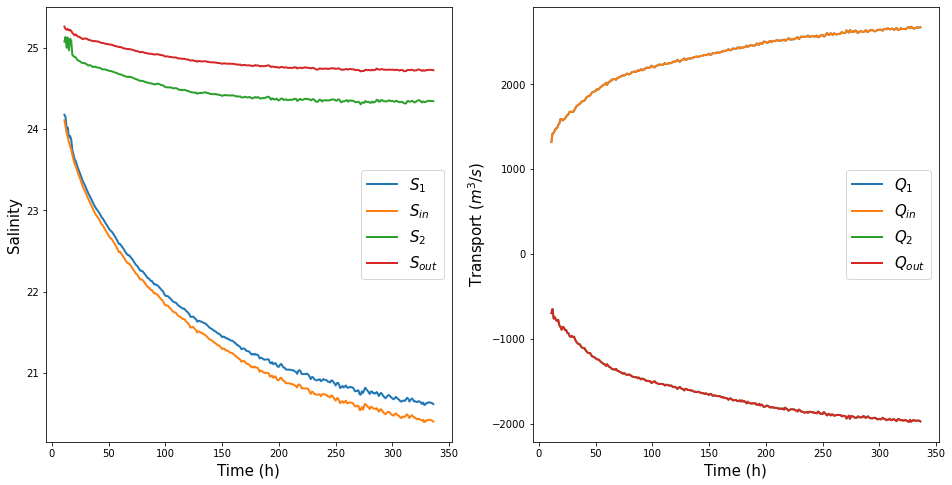

In [7]:
import ExchangeFlow2 as tef

xs = 71 # Location index of the sill crest

q1, q2, s1, s2 = tef.ef_Eu(u,s,da,xs)

qin, qout, sin, sout = tef.ef_TEF(u,s,da,xs)

fig1 = plt.figure(figsize=(16,8))
fig1.tight_layout()

ax1 = fig1.add_subplot(121)
ax1.plot(ot[10:],s1[10:],lw=2,label=r'$S_1$')
ax1.plot(ot[10:],sin[10:],lw=2,label=r'$S_{in}$')
ax1.plot(ot[10:],s2[10:],lw=2,label=r'$S_2$')
ax1.plot(ot[10:],sout[10:],lw=2,label=r'$S_{out}$')
ax1.legend(loc='right', fontsize=15)
ax1.set_ylabel(r'Salinity',size = 15)
ax1.set_xlabel(r'Time (h)', size = 15)

ax2 = fig1.add_subplot(122)
ax2.plot(ot[10:],q1[10:]*NY,lw=2,label=r'$Q_1$')
ax2.plot(ot[10:],qin[10:]*NY,lw=2,label=r'$Q_{in}$')
ax2.plot(ot[10:],q2[10:]*NY,lw=2,label=r'$Q_2$')
ax2.plot(ot[10:],qout[10:]*NY,lw=2,label=r'$Q_{out}$')
ax2.legend(loc='right', fontsize=15)
ax2.set_ylabel(r'Transport $(m^3/s)$',size = 15)
ax2.set_xlabel(r'Time (h)', size = 15)

In [5]:
# Calculate Salt Budget
q11, q21, s11, s21 = tef.ef_Eu(u,s,da,xs-1)
q12, q22, s12, s22 = tef.ef_Eu(u,s,da,xs+1)


qin1, qout1, sin1, sout1 = tef.ef_TEF(u,s,da,xs-1)
qin2, qout2, sin2, sout2 = tef.ef_TEF(u,s,da,xs+1)

Fe1 = q11*s11+s21*q21
Fe2 = q12*s12+s22*q22

Ft1 = qin1*sin1+qout1*sout1
Ft2 = qin2*sin2+qout2*sout2

F = da*s*grid.dxF.data[4,xs]
Fdt = np.zeros(len(ot))
dt = ot[1] - ot[0]
for tt in range(len(ot)-1):
    Fdt[tt] = 200 * (F[tt+1,:,xs].sum() - F[tt,:,xs].sum()) / (dt*3600)

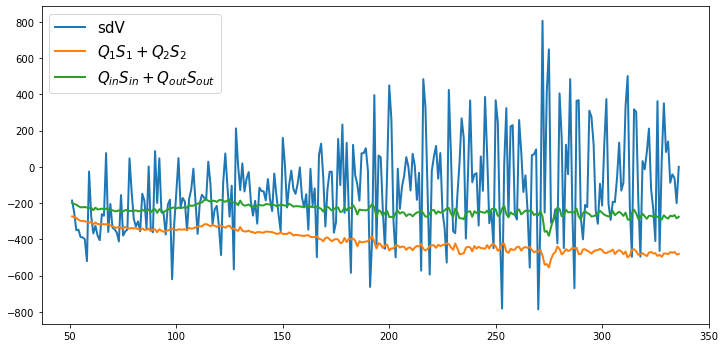

In [6]:
fig3, ax3 = plt.subplots(figsize=(10, 5))
fig3.tight_layout()

ax3.plot(ot[50:], NY*Fdt[50:], lw=2,label=r'sdV')
ax3.plot(ot[50:], NY*(Fe2[50:]-Fe1[50:]), lw=2,label=r'$Q_1S_1+Q_2S_2$')
ax3.plot(ot[50:], NY*(Ft2[50:]-Ft1[50:]), lw=2,label=r'$Q_{in}S_{in}+Q_{out}S_{out}$')
ax3.legend(loc='best', fontsize=15)


In [8]:
xrange = np.arange(48,72)

QEin = np.empty(len(xrange))
QEout = np.empty(len(xrange))
SEin = np.empty(len(xrange))
SEout = np.empty(len(xrange))
Qin = np.empty(len(xrange))
Qout = np.empty(len(xrange))
Sin = np.empty(len(xrange))
Sout = np.empty(len(xrange))

for xi in range(48,72):

    q1, q2, s1, s2 = tef.ef_Eu(u,s,da,xi)

    qin, qout, sin, sout = tef.ef_TEF(u,s,da,xi)
    
    QEin[xi-xrange[0]] = q1[275:].mean()
    QEout[xi-xrange[0]] = q2[275:].mean()
    SEin[xi-xrange[0]] = s1[275:].mean()
    SEout[xi-xrange[0]] = s2[275:].mean()
    
    Qin[xi-xrange[0]] = qin[275:].mean()
    Qout[xi-xrange[0]] = qout[275:].mean()
    Sin[xi-xrange[0]] = sin[275:].mean()
    Sout[xi-xrange[0]] = sout[275:].mean()

/Users/weiyangbao/Documents/Jupyter-Iceplume/Functions/ExchangeFlow2.py:158: RuntimeWarning: invalid value encountered in double_scalars
  Sm = QSm/Qm


Text(0.5, 0, 'X (m)')

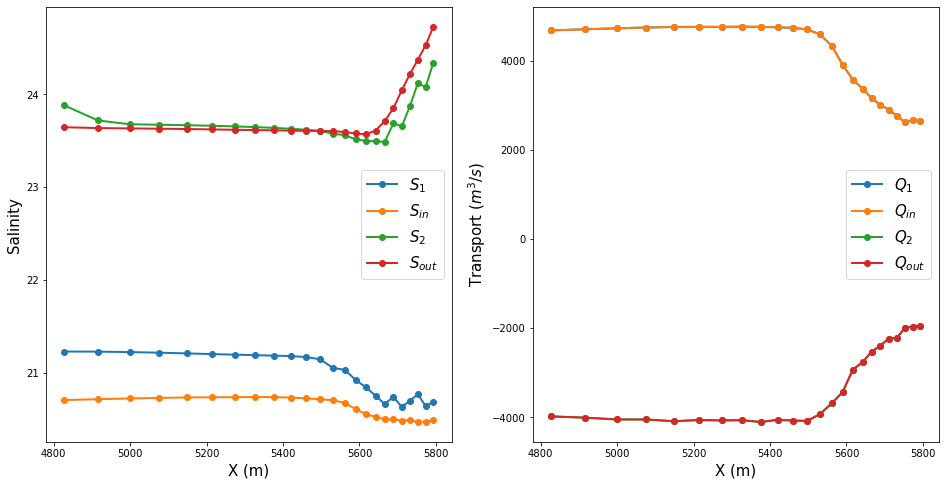

In [9]:
fig2 = plt.figure(figsize=(16,8))
fig2.tight_layout()
    
ax1 = fig2.add_subplot(121)
ax1.plot(x[xrange],SEin,'o-',lw=2,label=r'$S_1$')
ax1.plot(x[xrange],Sin,'o-',lw=2,label=r'$S_{in}$')
ax1.plot(x[xrange],SEout,'o-',lw=2,label=r'$S_2$')
ax1.plot(x[xrange],Sout,'o-',lw=2,label=r'$S_{out}$')
ax1.legend(loc='right', fontsize=15)
ax1.set_ylabel(r'Salinity',size = 15)
ax1.set_xlabel(r'X (m)', size = 15)

ax2 = fig2.add_subplot(122)
ax2.plot(x[xrange],QEin*NY,'o-',lw=2,label=r'$Q_1$')
ax2.plot(x[xrange],Qin*NY,'o-',lw=2,label=r'$Q_{in}$')
ax2.plot(x[xrange],QEout*NY,'o-',lw=2,label=r'$Q_2$')
ax2.plot(x[xrange],Qout*NY,'o-',lw=2,label=r'$Q_{out}$')
ax2.legend(loc='right', fontsize=15)
ax2.set_ylabel(r'Transport $(m^3/s)$',size = 15)
ax2.set_xlabel(r'X (m)', size = 15)

In [11]:
QEin, Qin

(array([519.82810035, 522.60281135, 524.96606982, 527.00838301,
        528.30366579, 528.65295886, 528.63779084, 529.05569857,
        528.60608389, 527.29812115, 526.23653082, 522.2657355 ,
        509.97521998, 481.63228119, 433.86605836, 396.97624521,
        374.41346697, 350.91833155, 334.19260317, 322.12282849,
        307.14278901, 290.86905407, 296.13502143, 293.83672988]),
 array([519.82810035, 522.60281135, 524.96606982, 527.00838301,
        528.30366579, 528.65295886, 528.63779084, 529.05569857,
        528.60608389, 527.29812115, 526.23653082, 522.2657355 ,
        509.97521998, 481.63228119, 433.86605836, 396.97624521,
        374.41346697, 350.91833155, 334.19260317, 322.12282849,
        307.14278901, 290.86905407, 296.13502143, 293.83672988]))

Variables are defined as:
	tef_q transport in salinity bins, hourly, (m3/s)
	tef_vel velocity in salinity bins, hourly, (m/s)
	tef_da area in salinity bins, hourly, (m2)
	tef_qs salt transport in salinity bins, hourly, (g/kg m3/s)
	tef_qs2 salinity-squared transport in salinity bins, hourly, (g2/kg2 m3/s)
	sbins the salinity bin centers
	ot ocean time (sec from 1/1/1970)
	qnet section integrated transport (m3/s)

Packed in order (time, salinity bin).

Note: we create tef_vel as the flux-weighted velocity: tef_vel=tef_q/tef_da.

In [10]:
fig_path = "/Users/weiyangbao/Documents/Results_Figs/TEF/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig1.savefig(fig_path + '/TS_sill.png', dpi=200, bbox_inches='tight')
fig2.savefig(fig_path + '/Sections.png', dpi=200, bbox_inches='tight')
#fig3.savefig(fig_path + '/SaltBudget.png', dpi=200, bbox_inches='tight')

In [14]:
sedges = np.linspace(0, 35, 1001)
sbins = sedges[:-1] + np.diff(sedges)/2
sbins.shape

(1000,)